# Przekształcenia zmiennych

Na tych zajęciach użyjemy zbioru danych dotyczących sprzedaży nieruchomości.

Link do zbioru danych: https://www.kaggle.com/datasets/mohammedaltet/egypt-houses-price

Kolumny w zbiorze:
- Type: the type of property
- Price: the price of property
- Bedrooms: number of bedrooms
- Bathrooms: number of bathrooms
- Area: the Area of the property by m^2
- Furnished: is the property Furnished or not
- Level: In what floor the property is ?
- Compound: ** In what Compound the property is ?**
- Payment_Option
- Delivery_Date
- City

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# puść ten kod, 
# jeżeli wywołujesz plik  w folderze rozwiąznaia, 
# a ramka danych znajduje się w folderze data
import os 
os.chdir('../')

In [3]:
df = pd.read_csv("data/egypt_houses_price_cleaned.csv")
del df['index']
del df['Unnamed: 0']

## Podstawowe przekształcenia

In [3]:
# logarytm
df['price_log'] = np.log(df['Price'])

In [4]:
df.describe()

,Price,Bedrooms,Bathrooms,Area,price_log
count,2.732100e+04,27321.000000,27321.000000,27321.000000,27321.000000
mean,4.761923e+06,3.239999,2.812306,228.357771,14.718943
std,6.766756e+06,1.207337,1.349658,159.801167,1.217385
min,3.000000e+04,1.000000,1.000000,10.000000,10.308953
25%,1.150000e+06,3.000000,2.000000,125.000000,13.955273
50%,2.731000e+06,3.000000,3.000000,175.000000,14.820178
75%,5.990000e+06,4.000000,3.000000,270.000000,15.605602
max,2.400000e+08,10.000000,10.000000,998.000000,19.296149


In [5]:
# zmienne do 3 potegi
PolynomialFeatures(3).fit_transform(df[['Price']])

array([[1.0000000e+00, 4.0000000e+06, 1.6000000e+13, 6.4000000e+19],
       [1.0000000e+00, 4.0000000e+06, 1.6000000e+13, 6.4000000e+19],
       [1.0000000e+00, 2.2500000e+06, 5.0625000e+12, 1.1390625e+19],
       ...,
       [1.0000000e+00, 1.3800000e+07, 1.9044000e+14, 2.6280720e+21],
       [1.0000000e+00, 3.5000000e+07, 1.2250000e+15, 4.2875000e+22],
       [1.0000000e+00, 4.8000000e+06, 2.3040000e+13, 1.1059200e+20]])

In [7]:
df[['Price','Area']]

,Price,Area
0,4000000.0,400.0
1,4000000.0,160.0
2,2250000.0,165.0
3,1900000.0,230.0
4,5800000.0,160.0
...,...,...
27316,890000.0,240.0
27317,4000000.0,218.0
27318,13800000.0,308.0
27319,35000000.0,478.0


In [6]:
#  interakcje
PolynomialFeatures(3,interaction_only=True).fit_transform(df[['Price','Area']])

array([[1.0000e+00, 4.0000e+06, 4.0000e+02, 1.6000e+09],
       [1.0000e+00, 4.0000e+06, 1.6000e+02, 6.4000e+08],
       [1.0000e+00, 2.2500e+06, 1.6500e+02, 3.7125e+08],
       ...,
       [1.0000e+00, 1.3800e+07, 3.0800e+02, 4.2504e+09],
       [1.0000e+00, 3.5000e+07, 4.7800e+02, 1.6730e+10],
       [1.0000e+00, 4.8000e+06, 1.7500e+02, 8.4000e+08]])

## Przekształcenie Box-Cox

In [11]:
# train test split

train, test, _,_ = train_test_split(df,df['Price'], test_size=0.2, random_state=123)

In [12]:
# Transformacja boxa-coxa
box_cox = PowerTransformer(method='box-cox',standardize=False).fit(train[['Price']])

In [13]:
# Lambda
box_cox.lambdas_

array([0.0815219])

In [17]:
# Zapis do ramki danych
box_cox_price = pd.DataFrame(box_cox.transform(test[['Price']]),columns = ['price_box_cox'])

In [18]:
# Transformacja yeo-johnson
yeo_johnson = PowerTransformer(method='yeo-johnson',standardize=False).fit(train[['Price']])

In [19]:
# Lambda
yeo_johnson.lambdas_

array([0.08152123])

In [20]:
# Zapis do ramki danych
yeo_johnson = pd.DataFrame(yeo_johnson.transform(test[['Price']]),columns = ['price_johnson'])

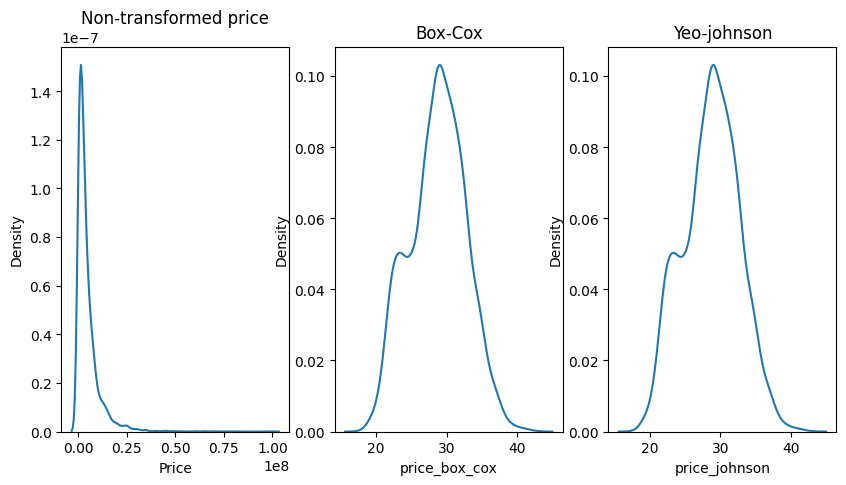

In [21]:
# Porównanie na wykresie
plt.rcParams['figure.figsize'] =[10,5]
fig, axs = plt.subplots(ncols=3, nrows=1)
sns.kdeplot(ax=axs[0],data=test['Price'])
axs[0].set_title('Non-transformed price')
sns.kdeplot(ax=axs[1], data=box_cox_price['price_box_cox'])
axs[1].set_title('Box-Cox')
sns.kdeplot(ax=axs[2], data=yeo_johnson['price_johnson'])
axs[2].set_title('Yeo-johnson')
plt.show()